# Bharat Intern Machine Learning Virtual Internship

In [57]:
#Performing task-1 House Price Prediction

In [58]:
#Loading all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [59]:
#Loading the dataset
data = pd.read_csv("C:\\Users\\G.Madhu mitha\\Downloads\\HousePricePrediction.csv")


In [60]:
data.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [61]:
data.size

37947

In [62]:
data.shape

(2919, 13)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 250.9+ KB


In [64]:
data.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [65]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [66]:
data['BldgType'].unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [67]:
data['BldgType'].value_counts()

1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64

In [68]:
data['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH', nan], dtype=object)

In [69]:
data['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [70]:
data['LotConfig'].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [71]:
data['LotConfig'].value_counts()

Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64

In [72]:
data['Exterior1st'].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock', nan], dtype=object)

In [73]:
data['Exterior1st'].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
Stone         2
AsphShn       2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [74]:
#Checking for null values in the data
data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [75]:
#filling the column saleprice with the mean value of that column
data['SalePrice'] = data['SalePrice'].fillna(data['SalePrice'].mean())

In [76]:
data['Exterior1st'] = data['Exterior1st'].fillna(value = 'VinylSd')

In [77]:
data['MSZoning'] = data['MSZoning'].fillna(value = 'Inside')

In [78]:
data['BsmtFinSF2'] = data['BsmtFinSF2'].fillna(data['BsmtFinSF2'].mean())

In [23]:
data['TotalBsmtSF'] = data['TotalBsmtSF'].fillna(data['TotalBsmtSF'].mean())

In [24]:
data.isna().sum()

Id              0
MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [25]:
data.corr()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
Id,1.000000,0.008931,-0.040746,-0.002839,-0.016581,-0.050438,0.018249,-0.024922,-0.007753
MSSubClass,0.008931,1.000000,-0.201730,-0.065625,0.034409,0.043315,-0.072520,-0.219936,-0.059294
LotArea,-0.040746,-0.201730,1.000000,-0.035617,0.024128,0.021612,0.084055,0.254125,0.236105
OverallCond,-0.002839,-0.065625,-0.035617,1.000000,-0.368477,0.047654,0.041489,-0.173952,-0.055036
YearBuilt,-0.016581,0.034409,0.024128,-0.368477,1.000000,0.612235,-0.027591,0.408466,0.368664
YearRemodAdd,-0.050438,0.043315,0.021612,0.047654,0.612235,1.000000,-0.062125,0.297969,0.354302
BsmtFinSF2,0.018249,-0.072520,0.084055,0.041489,-0.027591,-0.062125,1.000000,0.089410,-0.007672
TotalBsmtSF,-0.024922,-0.219936,0.254125,-0.173952,0.408466,0.297969,0.089410,1.000000,0.431912
SalePrice,-0.007753,-0.059294,0.236105,-0.055036,0.368664,0.354302,-0.007672,0.431912,1.000000


In [26]:
data.cov()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
Id,710290.000000,320.013708,-2.708414e+05,-2.663811,-423.300548,-888.179918,2601.950948,-9.256119e+03,-3.670366e+05
MSSubClass,320.013708,1807.748676,-6.764742e+04,-3.105881,44.315717,38.480014,-521.635917,-4.120971e+03,-1.416169e+05
LotArea,-270841.449966,-67647.423530,6.220471e+07,-312.692599,5764.341962,3561.563033,112153.586829,8.832699e+05,1.046055e+08
OverallCond,-2.663811,-3.105881,-3.126926e+02,1.239060,-12.424420,1.108344,7.813098,-8.533170e+01,-3.441369e+03
YearBuilt,-423.300548,44.315717,5.764342e+03,-12.424420,917.571430,387.495386,-141.394842,5.452672e+03,6.273184e+05
YearRemodAdd,-888.179918,38.480014,3.561563e+03,1.108344,387.495386,436.573621,-219.600169,2.743683e+03,4.158539e+05
BsmtFinSF2,2601.950948,-521.635917,1.121536e+05,7.813098,-141.394842,-219.600169,28620.727128,6.665920e+03,-7.290877e+04
TotalBsmtSF,-9256.118579,-4120.971337,8.832699e+05,-85.331703,5452.671906,2743.683435,6665.920109,1.942083e+05,1.069221e+07
SalePrice,-367036.608979,-141616.868614,1.046055e+08,-3441.369276,627318.437768,415853.926455,-72908.765286,1.069221e+07,3.155556e+09


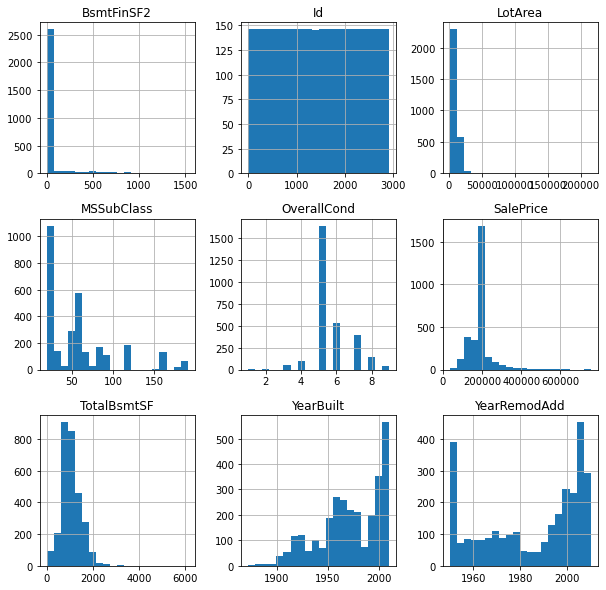

In [27]:
data.hist(bins=20, figsize=(10, 10))
plt.show()

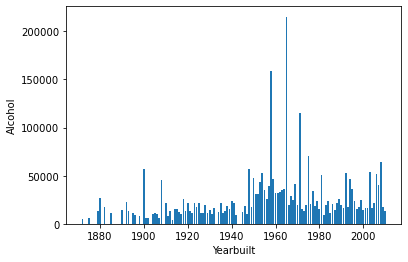

In [28]:
plt.bar(data['YearBuilt'], data['LotArea'])
plt.xlabel('Yearbuilt')
plt.ylabel('Alcohol')
plt.show()

# Handling of Outliers

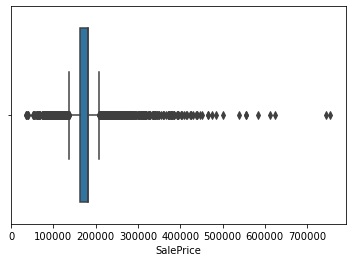

In [29]:
import seaborn as sn
sn.boxplot(data['SalePrice'])

In [30]:
q1 = data['SalePrice'].quantile(.25)
q3 = data['SalePrice'].quantile(.75)
print(q1)
print(q3)

163000.0
180921.19589041095


In [31]:
IQR = q3-q1
IQR

17921.19589041095

In [32]:
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR

In [33]:
data = data[data.SalePrice>lower_limit]
data = data[data.SalePrice<upper_limit]

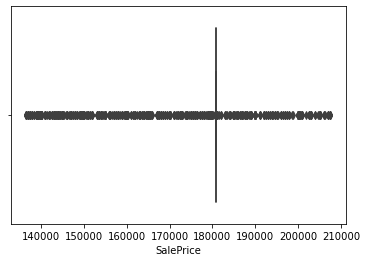

In [34]:
sn.boxplot(data['SalePrice'])

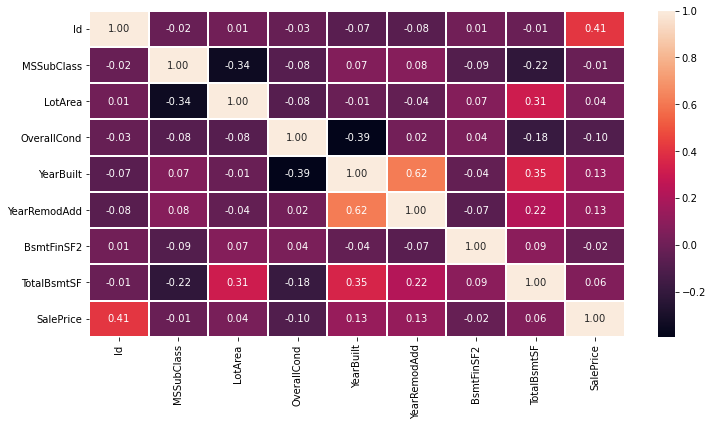

In [35]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(),fmt = '.2f',linewidths = 1,annot = True)

In [36]:
#Feature extraction and target values
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [37]:
X.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF'],
      dtype='object')

In [38]:
X.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0
5,5,50,RL,14115,Inside,1Fam,5,1993,1995,VinylSd,0.0,796.0
7,7,60,RL,10382,Corner,1Fam,6,1973,1973,HdBoard,32.0,1107.0
12,12,20,RL,12968,Inside,1Fam,6,1962,1962,HdBoard,0.0,912.0


In [39]:
y.head()

1     181500.0
3     140000.0
5     143000.0
7     200000.0
12    144000.0
Name: SalePrice, dtype: float64

In [40]:
data.isnull().sum()

Id              0
MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [41]:
from sklearn.preprocessing import OneHotEncoder
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [42]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(data[object_cols]))
OH_cols.index = data.index
OH_cols.columns = OH_encoder.get_feature_names()
data2 = data.drop(object_cols, axis=1)
data2 = pd.concat([data2, OH_cols], axis=1)

In [46]:
#Splitting the data into train and test datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
X_train

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF
2752,2752,20,RL,13300,Inside,1Fam,5,1956,2001,Wd Sdng,0.0,1015.0
2662,2662,60,RL,13215,Corner,1Fam,5,2004,2004,VinylSd,0.0,1420.0
854,854,20,RL,17920,Inside,1Fam,4,1955,1974,Wd Sdng,1085.0,1763.0
220,220,20,RL,8990,Inside,1Fam,5,2006,2006,VinylSd,0.0,1498.0
2703,2703,20,RL,9240,Inside,1Fam,6,1962,2002,HdBoard,0.0,864.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2473,2473,50,RM,10320,Corner,1Fam,1,1910,1950,Wd Sdng,0.0,771.0
1930,1930,85,RL,7669,Inside,1Fam,6,1992,1993,HdBoard,110.0,828.0
1965,1965,120,RL,2529,Inside,Twnhs,6,1977,1977,Plywood,0.0,1055.0
2129,2129,70,RM,10266,Inside,1Fam,6,1952,1952,MetalSd,0.0,768.0


In [48]:
X_test

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF
2768,2768,20,RL,7000,Inside,1Fam,4,1961,1961,BrkFace,0.0,1150.0
1666,1666,60,RL,23303,CulDSac,1Fam,5,2007,2007,VinylSd,0.0,1508.0
2188,2188,20,RL,47007,Inside,1Fam,7,1959,1996,Plywood,0.0,0.0
1817,1817,70,RM,8400,Corner,1Fam,7,1900,1950,Stucco,0.0,917.0
2623,2623,60,RL,13751,CulDSac,1Fam,5,2005,2006,VinylSd,0.0,1700.0
...,...,...,...,...,...,...,...,...,...,...,...,...
109,109,20,RL,11751,Inside,1Fam,6,1977,1977,Plywood,0.0,1844.0
2072,2072,20,RL,10180,Corner,1Fam,6,1968,1968,HdBoard,0.0,912.0
1139,1139,30,RL,8731,Inside,1Fam,5,1920,1950,Stucco,0.0,915.0
407,407,70,RL,15576,Inside,1Fam,7,1915,1976,Wd Sdng,0.0,840.0


In [49]:
y_train

2752    180921.19589
2662    180921.19589
854     170000.00000
220     204900.00000
2703    180921.19589
            ...     
2473    180921.19589
1930    180921.19589
1965    180921.19589
2129    180921.19589
1695    180921.19589
Name: SalePrice, Length: 1667, dtype: float64

In [50]:
y_test

2768    180921.19589
1666    180921.19589
2188    180921.19589
1817    180921.19589
2623    180921.19589
            ...     
109     190000.00000
2072    180921.19589
1139    144000.00000
407     177000.00000
755     172500.00000
Name: SalePrice, Length: 417, dtype: float64

In [54]:
#Training the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [56]:
#Apply Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
'''y_pred = model_LR.predict(X_test)
def mean_absolute_percentage_error(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(mean_absolute_percentage_error(y_test, y_pred))'''

ValueError: could not convert string to float: 'RL'